## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
earlystop = EarlyStopping(monitor="val_loss", 
                          patience=5, 
                          verbose=1
                          )
earlystop_1 = EarlyStopping(monitor="val_accuracy", 
                          patience=10, 
                          verbose=1
                          )
earlystop_2 = EarlyStopping(monitor="val_accuracy", 
                          patience=25, 
                          verbose=1
                          )
earlystops = [earlystop, earlystop_1, earlystop_2]


results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
i = 0
for es in earlystops:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer) 
    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[es]
         )
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["accuracy"],
                             'valid-acc': model.history.history["val_accuracy"]}
    i+=1

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512 

50000/50000 [==============================] - 2s 34us/step - loss: 1.2922 - accuracy: 0.5499 - val_loss: 1.5091 - val_accuracy: 0.4648
Epoch 11/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.2621 - accuracy: 0.5625 - val_loss: 1.4800 - val_accuracy: 0.4773
Epoch 12/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.2351 - accuracy: 0.5724 - val_loss: 1.4899 - val_accuracy: 0.4759
Epoch 13/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.2089 - accuracy: 0.5812 - val_loss: 1.4785 - val_accuracy: 0.4820
Epoch 14/50
50000/50000 [==============================] - 2s 35us/step - loss: 1.1838 - accuracy: 0.5908 - val_loss: 1.4704 - val_accuracy: 0.4846
Epoch 15/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.1608 - accuracy: 0.6006 - val_loss: 1.4663 - val_accuracy: 0.4878
Epoch 16/50
50000/50000 [==============================] - 2s 34us/step - loss: 1.1350 - accuracy: 0.6103 - val_loss: 1.4775

50000/50000 [==============================] - 2s 33us/step - loss: 1.2603 - accuracy: 0.5640 - val_loss: 1.4860 - val_accuracy: 0.4770
Epoch 13/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.2333 - accuracy: 0.5728 - val_loss: 1.4783 - val_accuracy: 0.4817
Epoch 14/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.2097 - accuracy: 0.5817 - val_loss: 1.4693 - val_accuracy: 0.4855
Epoch 15/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.1860 - accuracy: 0.5914 - val_loss: 1.4682 - val_accuracy: 0.4851
Epoch 16/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.1632 - accuracy: 0.5982 - val_loss: 1.4634 - val_accuracy: 0.4935
Epoch 17/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.1396 - accuracy: 0.6077 - val_loss: 1.4676 - val_accuracy: 0.4874
Epoch 18/50
50000/50000 [==============================] - 2s 33us/step - loss: 1.1171 - accuracy: 0.6163 - val_loss: 1.4595

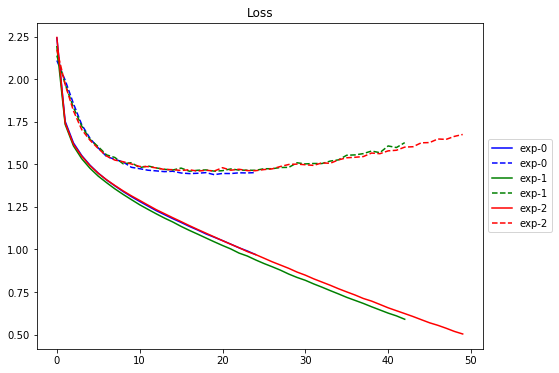

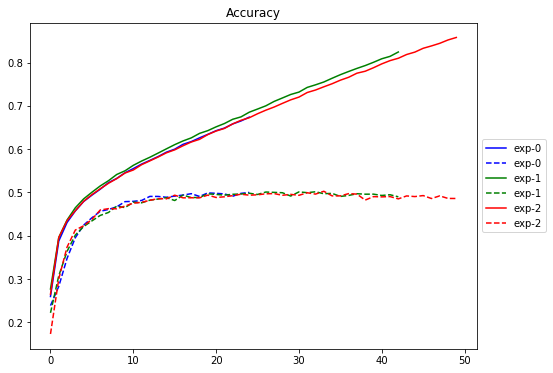

In [8]:
"""Code Here
將結果繪出
"""
colors = ['b', 'g', 'r']


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=colors[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=colors[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=colors[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=colors[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))